# Principal Component Analysis
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Principal Component Analysis** and apply it to **restore rotated CAPTCHA**
- play with **Eigenface** by applying PCA on a real world face dataset
- use PCA to do **dimension reduction**. Evaluate the loss of information qualitatively and quantitatively

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [307]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Now let's hack the rotated CAPTCHA!

rotate degree:  -29.951595312425077
rotate degree:  29.951595312425077
rotate degree:  45.0
rotate degree:  -45.0
rotate degree:  15.000488224109631


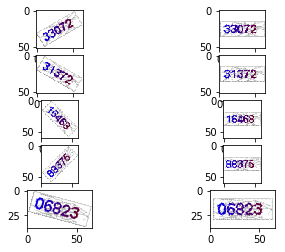

In [323]:
from hack_pca import hack_pca

# Hack different images yourself
f, axarr = plt.subplots(5,2)
for i in range(5):
    img, rotate = hack_pca(str(i+1) + '.gif')
    axarr[i, 0].imshow(img)
    axarr[i, 1].imshow(rotate)

## Apply PCA on face image

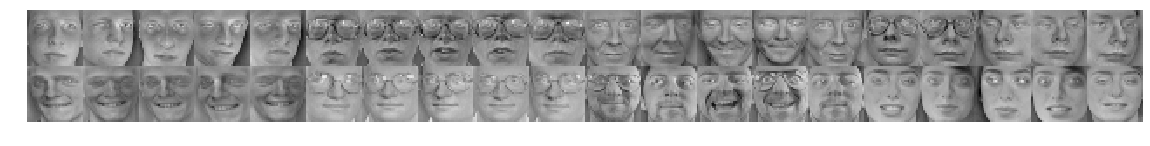

In [211]:
# load data
ORL_data = sio.loadmat('ORL_data.mat')
fea_Train = ORL_data['fea_Train']
gnd_Train = ORL_data['gnd_Train'].reshape(-1)
fea_Test = ORL_data['fea_Test']
gnd_Test = ORL_data['gnd_Test'].reshape(-1)
# YOUR CODE HERE

# 1. Feature preprocessing
# begin answer
fea_Train = ( fea_Train - np.mean(fea_Train, axis=0) ) / np.std(fea_Train, axis=0)
# end answer
from show_face import show_face
show_face(fea_Train)

In [220]:
# 2. Run PCA
# begin answer
import pca
values, eigvector = pca.PCA(fea_Train)
# end answer

D:\conda\lib\site-packages\ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


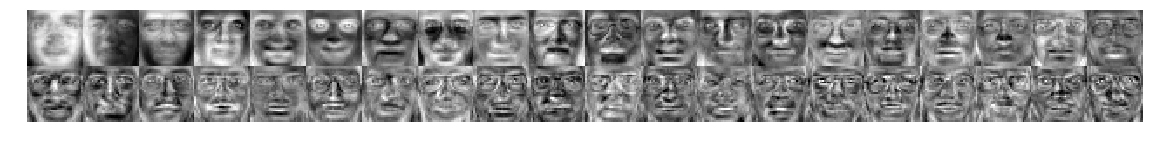

In [221]:
# 3. Visualize eigenface
# begin answer
eigmax, eigmin = (np.max(eigvector, axis=0), np.min(eigvector, axis=0))
eigface = (eigvector - eigmin)/(eigmax - eigmin) * 255
eigface = eigface.astype('int')
show_face(eigface.T)
# end answer

In [222]:
fea_Test = ( fea_Test - np.mean(fea_Test, axis=0) ) / np.std(fea_Test, axis=0)

d = 8, accuracy = 0.74


C:\Users\DELL\Desktop\course\数据挖掘\code\hw4\pca\show_face.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  = fea[i * numPerLine + j, :].reshape((faceH, faceW)).transpose()


d = 16, accuracy = 0.815
d = 32, accuracy = 0.855
d = 64, accuracy = 0.88
d = 128, accuracy = 0.875


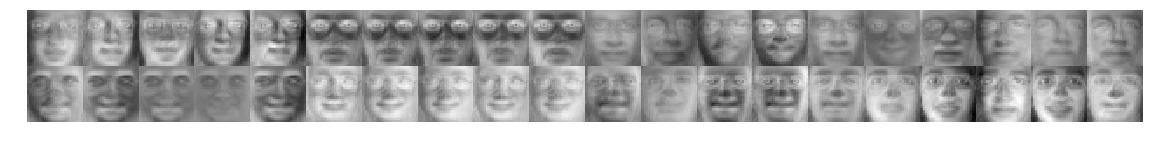

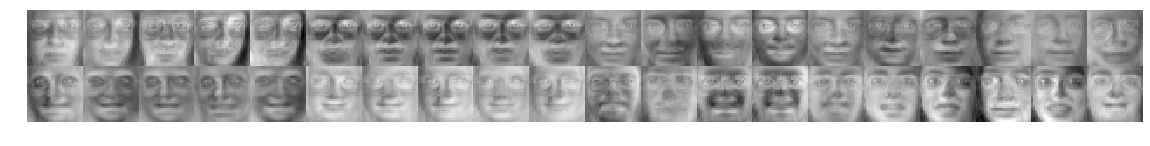

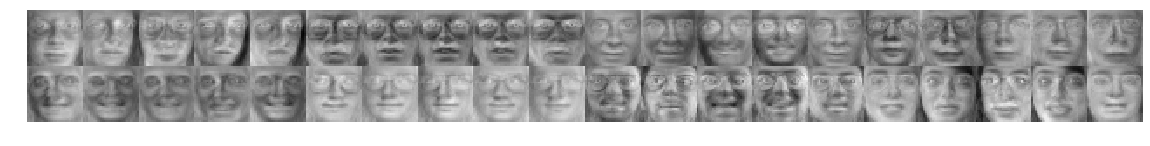

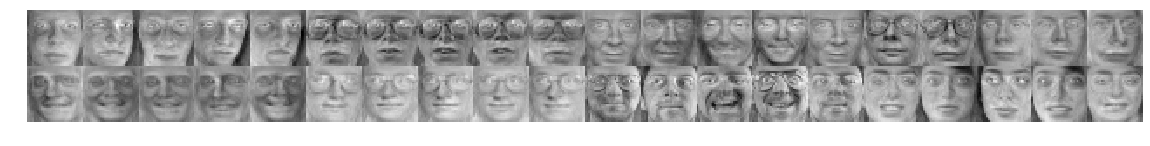

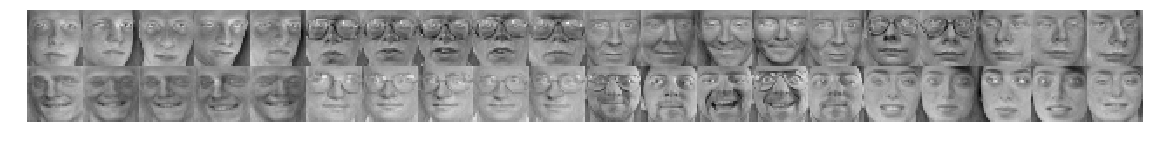

In [238]:
# 4. Project data on to low dimensional space
import knn
D = [8, 16, 32, 64, 128]
for d in D:
    low_dim_data_test = np.matmul(fea_Test, eigvector[:,0:d])
    low_dim_data_train = np.matmul(fea_Train, eigvector[:,0:d])
    # 5. Run KNN in low dimensional space
    y = knn.knn(low_dim_data_test, low_dim_data_train, gnd_Train, 1)
    print("d = {0}, accuracy = {1}".format(d, (y == gnd_Test).sum() / y.shape[0]))
    origin = np.matmul(low_dim_data_train, eigvector[:,0:d].T)
    show_face(origin)

## You are encouraged to apply LDA on this dataset!

In [ ]:
from LDA import LDA

# Your code here
# begin answer
# end answer